In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 20GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/elon-musks-tweets-dataset-2022/cleandata.csv
/kaggle/input/elon-musks-tweets-dataset-2022/rawdata.csv
/kaggle/input/elon-musks-tweets-dataset-2022/userinfo.csv


In [2]:
#importing libiries
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns 
import re
from textblob import TextBlob

%matplotlib inline 

#   Reading the data 

In [3]:
data =pd.read_csv("/kaggle/input/elon-musks-tweets-dataset-2022/rawdata.csv")

In [4]:
#show the data 
data.head()

,Tweets,Retweets,Likes,Date
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32


#### we can see that data  contain 4 columns , data not cleaning so we will  clean it i anther section

In [5]:
# cheak if there is nan values 

data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3060 entries, 0 to 3059
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   Tweets    3060 non-null   object
 1   Retweets  3060 non-null   int64 
 2   Likes     3060 non-null   int64 
 3   Date      3060 non-null   object
dtypes: int64(2), object(2)
memory usage: 95.8+ KB


### data hasn't nan values  so we will continues to data cleaning 


# DAta cleaning

In [6]:
# we will create function to clean tweets  to make code more effiecent and clean
def cleantwt(twt):
  emoj = re.compile("["
        u"\U0001F600-\U0001F64F"  # emoticons
        u"\U0001F300-\U0001F5FF"  # symbols & pictographs
        u"\U0001F680-\U0001F6FF"  # transport & map symbols
        u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
        u"\U00002500-\U00002BEF"  # chinese char
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        u"\U0001f926-\U0001f937"
        u"\U00010000-\U0010ffff"
        u"\u2640-\u2642" 
        u"\u2600-\u2B55"
        u"\u200d"
        u"\u23cf"
        u"\u23e9"
        u"\u231a"
        u"\ufe0f"  # dingbats
        u"\u3030"
                      "]+", re.UNICODE)

  twt = re.sub('RT', '', twt) # remove 'RT' from tweets
  twt = re.sub('#[A-Za-z0-9]+', '', twt) # remove the '#' from the tweets
  twt = re.sub('\\n', '', twt) # remove the '\n' character
  twt = re.sub('https?:\/\/\S+', '', twt) # remove the hyperlinks
  twt = re.sub('@[\S]*', '', twt) # remove @mentions
  twt = re.sub('^[\s]+|[\s]+$', '', twt) # remove leading and trailing whitespaces
  twt = re.sub(emoj, '', twt) # remove emojis
  return twt

In [7]:
 # we want here to use function on tweets and see the result in a new column
data['Cleaned_Tweets'] = data['Tweets'].apply(cleantwt)

In [8]:
data.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers
3,@BillyM2k 👻,802,19353,2022-10-27 02:32:48,
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!


In [9]:
#how many data has empty cell after cleaning 
data[data["Cleaned_Tweets"] == ""] .count()

Tweets            392
Retweets          392
Likes             392
Date              392
Cleaned_Tweets    392
dtype: int64

In [10]:
#delete or drop rows that data in it  has  empty value
data.drop(data[data['Cleaned_Tweets']==''].index, inplace=
         True)

In [11]:
#cheak that  we do drop right 
data[data["Cleaned_Tweets"] == ""] .count()

Tweets            0
Retweets          0
Likes             0
Date              0
Cleaned_Tweets    0
dtype: int64

In [12]:
#create function to get subjectivity
def getSubjectivity(text):
   return TextBlob(text).sentiment.subjectivity

 #Create a function to get the polarity
def getPolarity(text):
   return TextBlob(text).sentiment.polarity
def getSentiment(value):
  if value < 0:
    return 'Negative'
  elif value > 0:
    return 'Positive'
  else:
    return 'Neutral'

In [13]:
data["subjectivity"]=data['Cleaned_Tweets'].apply(getSubjectivity)
data["polarity"]=data['Cleaned_Tweets'].apply(getPolarity)
data["sentiment"]=data['polarity'].apply(getSentiment)

In [14]:
#show data
data.head()

,Tweets,Retweets,Likes,Date,Cleaned_Tweets,subjectivity,polarity,sentiment
0,@PeterSchiff 🤣 thanks,209,7021,2022-10-27 16:17:39,thanks,0.20,0.2000,Positive
1,@ZubyMusic Absolutely,755,26737,2022-10-27 13:19:25,Absolutely,0.90,0.2000,Positive
2,Dear Twitter Advertisers https://t.co/GMwHmInPAS,55927,356623,2022-10-27 13:08:00,Dear Twitter Advertisers,0.00,0.0000,Neutral
4,Meeting a lot of cool people at Twitter today!,9366,195546,2022-10-26 21:39:32,Meeting a lot of cool people at Twitter today!,0.65,0.4375,Positive
5,Entering Twitter HQ – let that sink in! https:...,145520,1043592,2022-10-26 18:45:58,Entering Twitter HQ – let that sink in!,0.00,0.0000,Neutral


# visualiztion

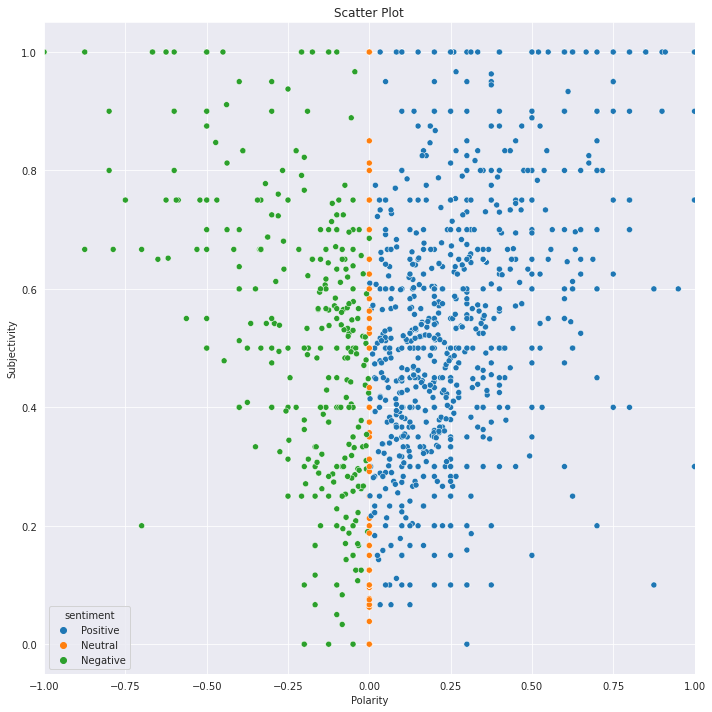

In [15]:
sns.set_style("darkgrid")
plt.figure(figsize=(10,10))

markers = {'Positive':'o', 'Neutral':'s','Negative':'X'}

sns.scatterplot(data=data,x="polarity" ,y="subjectivity" , hue="sentiment",
markers = markers).set(xlim=(-1,1))
plt.title('Scatter Plot')
plt.xlabel('Polarity')
plt.ylabel('Subjectivity')

plt.tight_layout()

Text(0.5, 1.0, 'Numbers of tweets by Sentiment ')

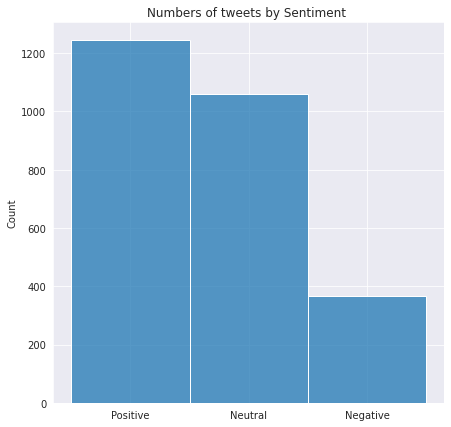

In [16]:
# using seeaborn lib to create barplot to show counts of tweets accourding to sentimnet value

plt.figure(figsize=(7,7))
sns.histplot(data, x="sentiment" ).set(xlabel=None)
plt.title("Numbers of tweets by Sentiment ")


#### Accourding this data most of elon mask's tweets are positive or natural 

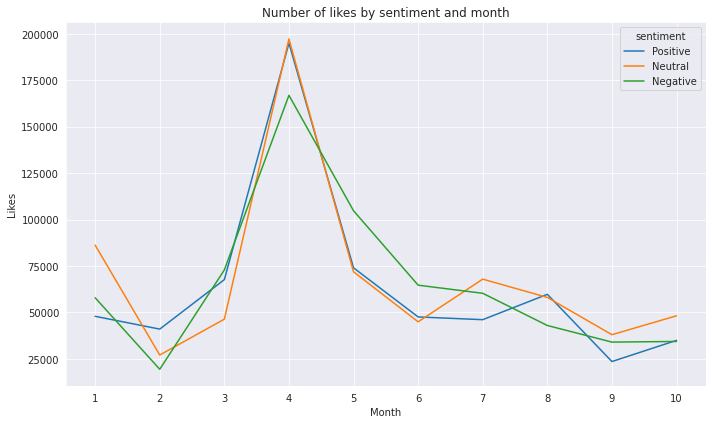

In [17]:
data['Month'] = pd.DatetimeIndex(data['Date']).month

# Creating a plot to show number of likes depending on sentiment through time

plt.figure(figsize = (10, 6))

months = data['Month'].unique()

sns.lineplot(x = 'Month', y = 'Likes', hue = 'sentiment', ci = None, data = data)
plt.title('Number of likes by sentiment and month')
plt.xlabel('Month')
plt.xticks(ticks = [m for m in months])
plt.tight_layout()

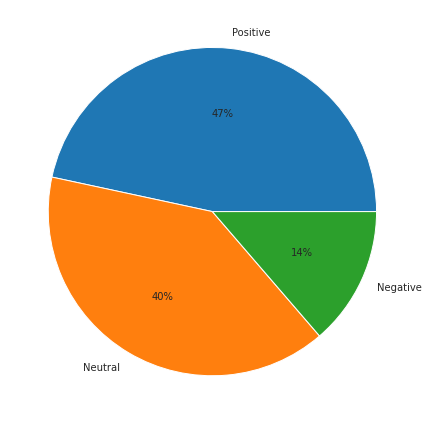

In [18]:
plt.figure(figsize=(10,6))
data_counts=data['sentiment'].value_counts()
labels=['Positive', 'Neutral', 'Negative']

plt.pie(data_counts, labels=labels,autopct = '%.0f%%')
plt.tight_layout()

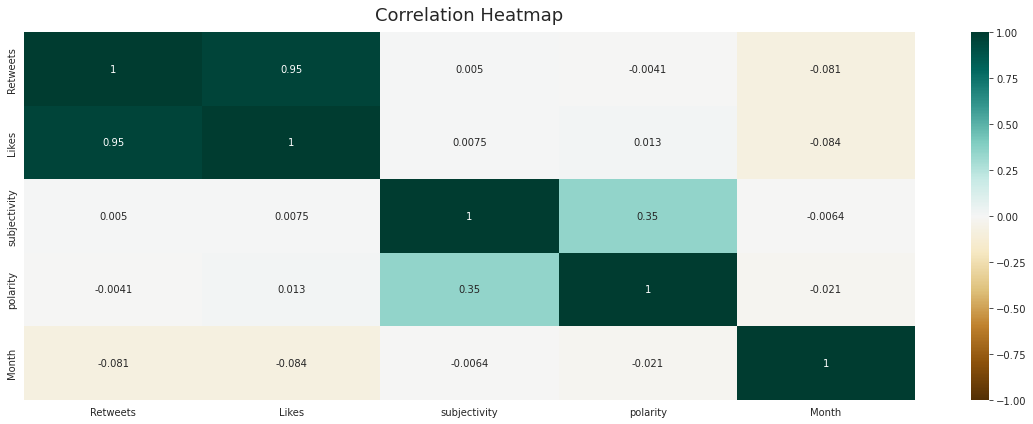

In [19]:
plt.figure(figsize=(16, 6))

heatmap = sns.heatmap(data.corr(), vmin=-1, vmax=1, annot=True, cmap='BrBG')
heatmap.set_title('Correlation Heatmap', fontdict={'fontsize':18}, pad=12)

plt.tight_layout()